Perspective Tranformation

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


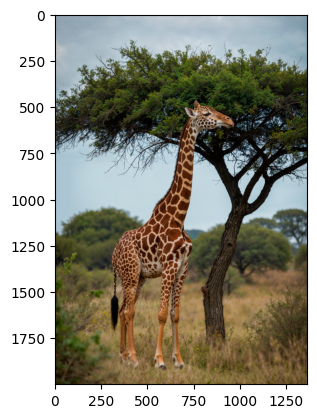

In [7]:
image = cv2.imread("./giraffe_kenya.jpg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [8]:
image_rgb.shape

(2000, 1367, 3)

In [9]:
rows,cols,_ = image_rgb.shape
input_points = np.float32([[50,50],[cols-50,50],[50,rows-50],[cols-50,rows-50]])
output_points = np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])
'''
Transformation matrix for Perspective transformation

3x3
a, b, c
d, e, f
g, h,i
a,b,c is responsible for horizontal scaling, rotation and translation
d,e,f is responsible for vertical scaling, rotation and translation
g,h : Perspective components that account for depth and skew
'''
M = cv2.getPerspectiveTransform(input_points,output_points)
print(M)

[[ 1.01706597e+00  4.91343918e-02 -4.32924431e+01]
 [-3.86165154e-02  1.02997123e+00  5.06080141e+01]
 [ 1.83228108e-05  1.68272067e-05  1.00000000e+00]]


(np.float64(-0.5), np.float64(1366.5), np.float64(1999.5), np.float64(-0.5))

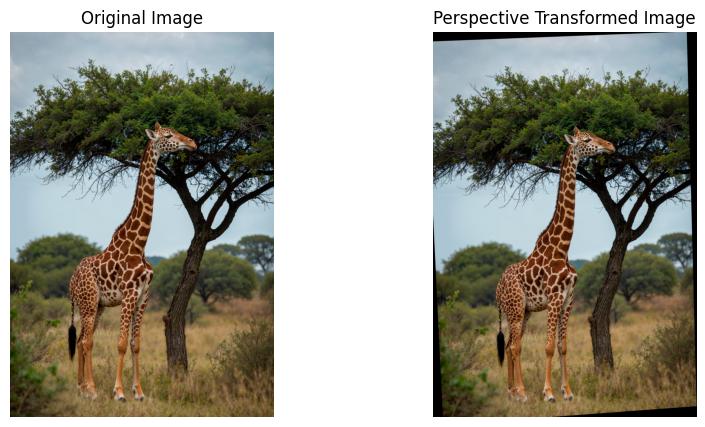

In [10]:
#takes the rows and cols opposite like x and y
perspective_image = cv2.warpPerspective(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("Perspective Transformed Image")
plt.axis("off")

Affine Tranformation

(np.float64(-0.5), np.float64(1366.5), np.float64(1999.5), np.float64(-0.5))

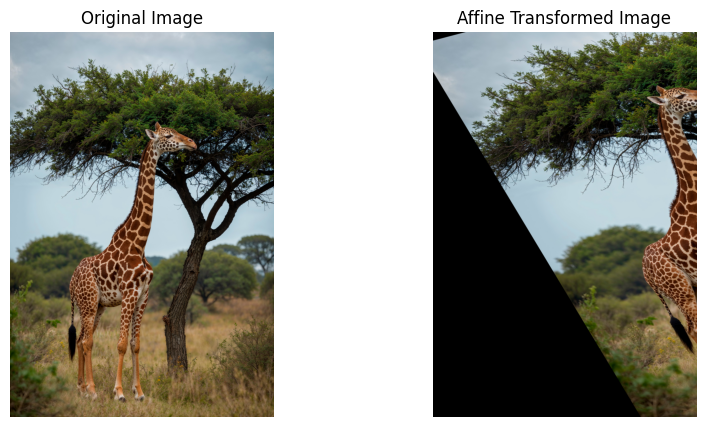

In [11]:
#For affine 3 points and for persp 4 points
input_points = np.float32([[50,50],[200,50],[50,200]])
output_points = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(input_points,output_points)

affine_image = cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

Rotation

(np.float64(-0.5), np.float64(1366.5), np.float64(1999.5), np.float64(-0.5))

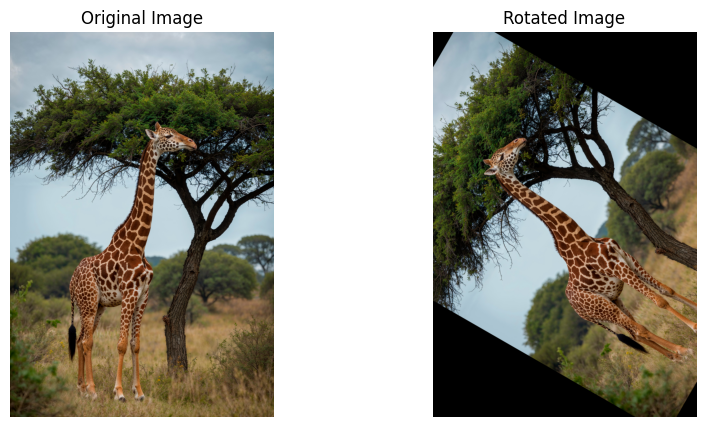

In [14]:
angle = 60
centre = (cols //2,rows//2)
scale = 1.0

M = cv2.getRotationMatrix2D(centre,angle,scale)

rotated_image = cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis("off")

Shearing

(np.float64(-0.5), np.float64(2733.5), np.float64(1999.5), np.float64(-0.5))

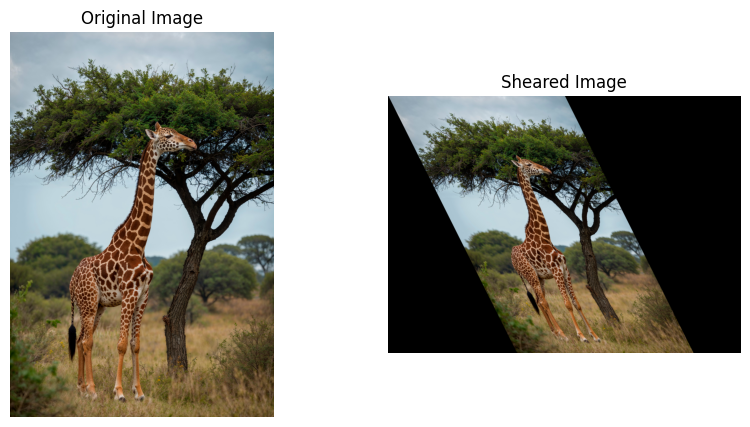

In [16]:
angle = 60
centre = (cols //2,rows//2)
scale = 1.0

shear_x,shear_y = 0.5,0

M = np.float32([[1,shear_x,0],[shear_y,1,0]])

sheared_image = cv2.warpAffine(image_rgb,M,(cols*2,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

Translation

Text(0.5, 1.0, 'Translated Image')

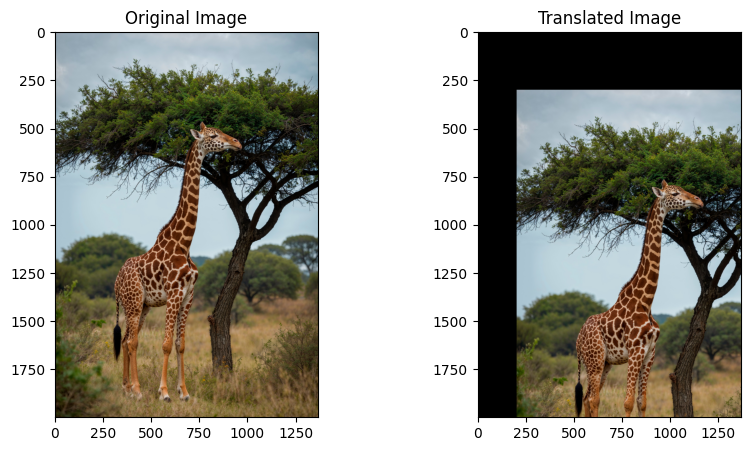

In [18]:
tx,ty = 200,300

M = np.float32([[1,0,tx],[0,1,ty]])

translated_image = cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
# plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated Image")
# plt.axis("off")